# Introduction to Python for Earth Scientists

These notebooks have been developed by Calum Chamberlain, Finnigan Illsley-Kemp and John Townend at [Victoria University of Wellington---Te Herenga Waka](https://www.wgtn.ac.nz) for use by students entering the postgraduate programme in Earth Science.

We presume very little background in command-line or code-based computing, and have compiled this material with an emphasis on general tasks that a grad student might encounter on a daily basis. 

| Notebook | Contents | Data |
| --- | --- | --- |
| [1A](ESCI451_Module_1A.ipynb) | Introduction to programming, Python, and Jupyter notebooks | - |
| [1B](ESCI451_Module_1B.ipynb) | Basic data types and variables, getting data, and plotting with Matplotlib | Geodetic positions |
| [2A](ESCI451_Module_2A.ipynb) | More complex plotting, introduction to Numpy | Geodetic positions; DFDP-2B temperatures |
| [2B](ESCI451_Module_2B.ipynb) | Using Pandas to load, peruse and plot data | Earthquake catalogue  |
| [3A](ESCI451_Module_3A.ipynb) | Working with Pandas dataframes | Geochemical data set; earthquake catalogue |
| [3B](ESCI451_Module_3B.ipynb) | Simple time series analysis using Pandas | Historical temperature records |
| [**4A**](ESCI451_Module_4A.ipynb) | **Making maps with PyGMT** | **Earthquake catalogue** |
| [4B](ESCI451_Module_4B.ipynb) | Working with gridded data | DEMs and Ashfall data |

The content may change in response to students' questions or current events. Each of the four modules has been designed to take about three hours, with a short break between each of the two parts.

<a href="https://www.generic-mapping-tools.org/">
    <img src="https://www.generic-mapping-tools.org/_static/gmt-logo.png" alt="GMT logo" title="GMT" align="center" height="60" />
</a>


# Mapping with PyGMT

Earth Science is, shockingly, about the Earth, and often involves making maps. Thankfully, we don't have to 
continue to draw maps by hand, and you can even consider putting away your colouring pencils (but keep them 
close at hand, just in case).

There are many tools out there for making maps. For more advanced mapping, and interactive mapping you may
want to consider working with GIS (Geographic Information System) tools like [QGIS](https://www.qgis.org/en/site/). 
We won't cover GIS here, and in fact SGEES has a whole [Masters program dedicated to GIS](https://www.wgtn.ac.nz/explore/postgraduate-programmes/master-of-geographic-information-science/overview), as well as specific courses that you could take, like [GISC420](https://www.wgtn.ac.nz/courses/gisc/420/2021/offering?crn=33043).

In this notebook we will cover some basic map-making using the Python package [PyGMT](https://www.pygmt.org/latest/).
This is a Python version of the classic mapping tool [GMT](https://www.generic-mapping-tools.org/), however it remains under development (as most open-source
scientific software does!), so you can expect that some features will continue to be added. For what we show though, it does the job well. However it is lacking a few more advanced thins that the developers are adding as time goes by.

In this notebook we will cover:
1. Basic map making;
2. Changing map projections;
3. Adding labels and map adornments (grids, north arrow, scale);
4. Plotting some geospatial data.

We will then advance on to making some more advanced maps with some fun datasets.

---
## Basic Map Making

First off let's import PyGMT:

In [1]:
import pygmt

Figures are generated in PyGMT with the `pygmt.Figure` class. We can start a new figure by creating an instance of this class:

In [2]:
fig = pygmt.Figure()

Now we want to add objects into this figure. Let's start by plotting some coastlines with the module `coast`.

First, we need to define the geographical region we want to plot. This can be passed as a list to the `region` parameter of `coast`. Let's stay at home and plot New Zealand:

In [3]:
fig.coast(region=[165,179,-49,-34], 
          shorelines=True)

Now let's take a look:

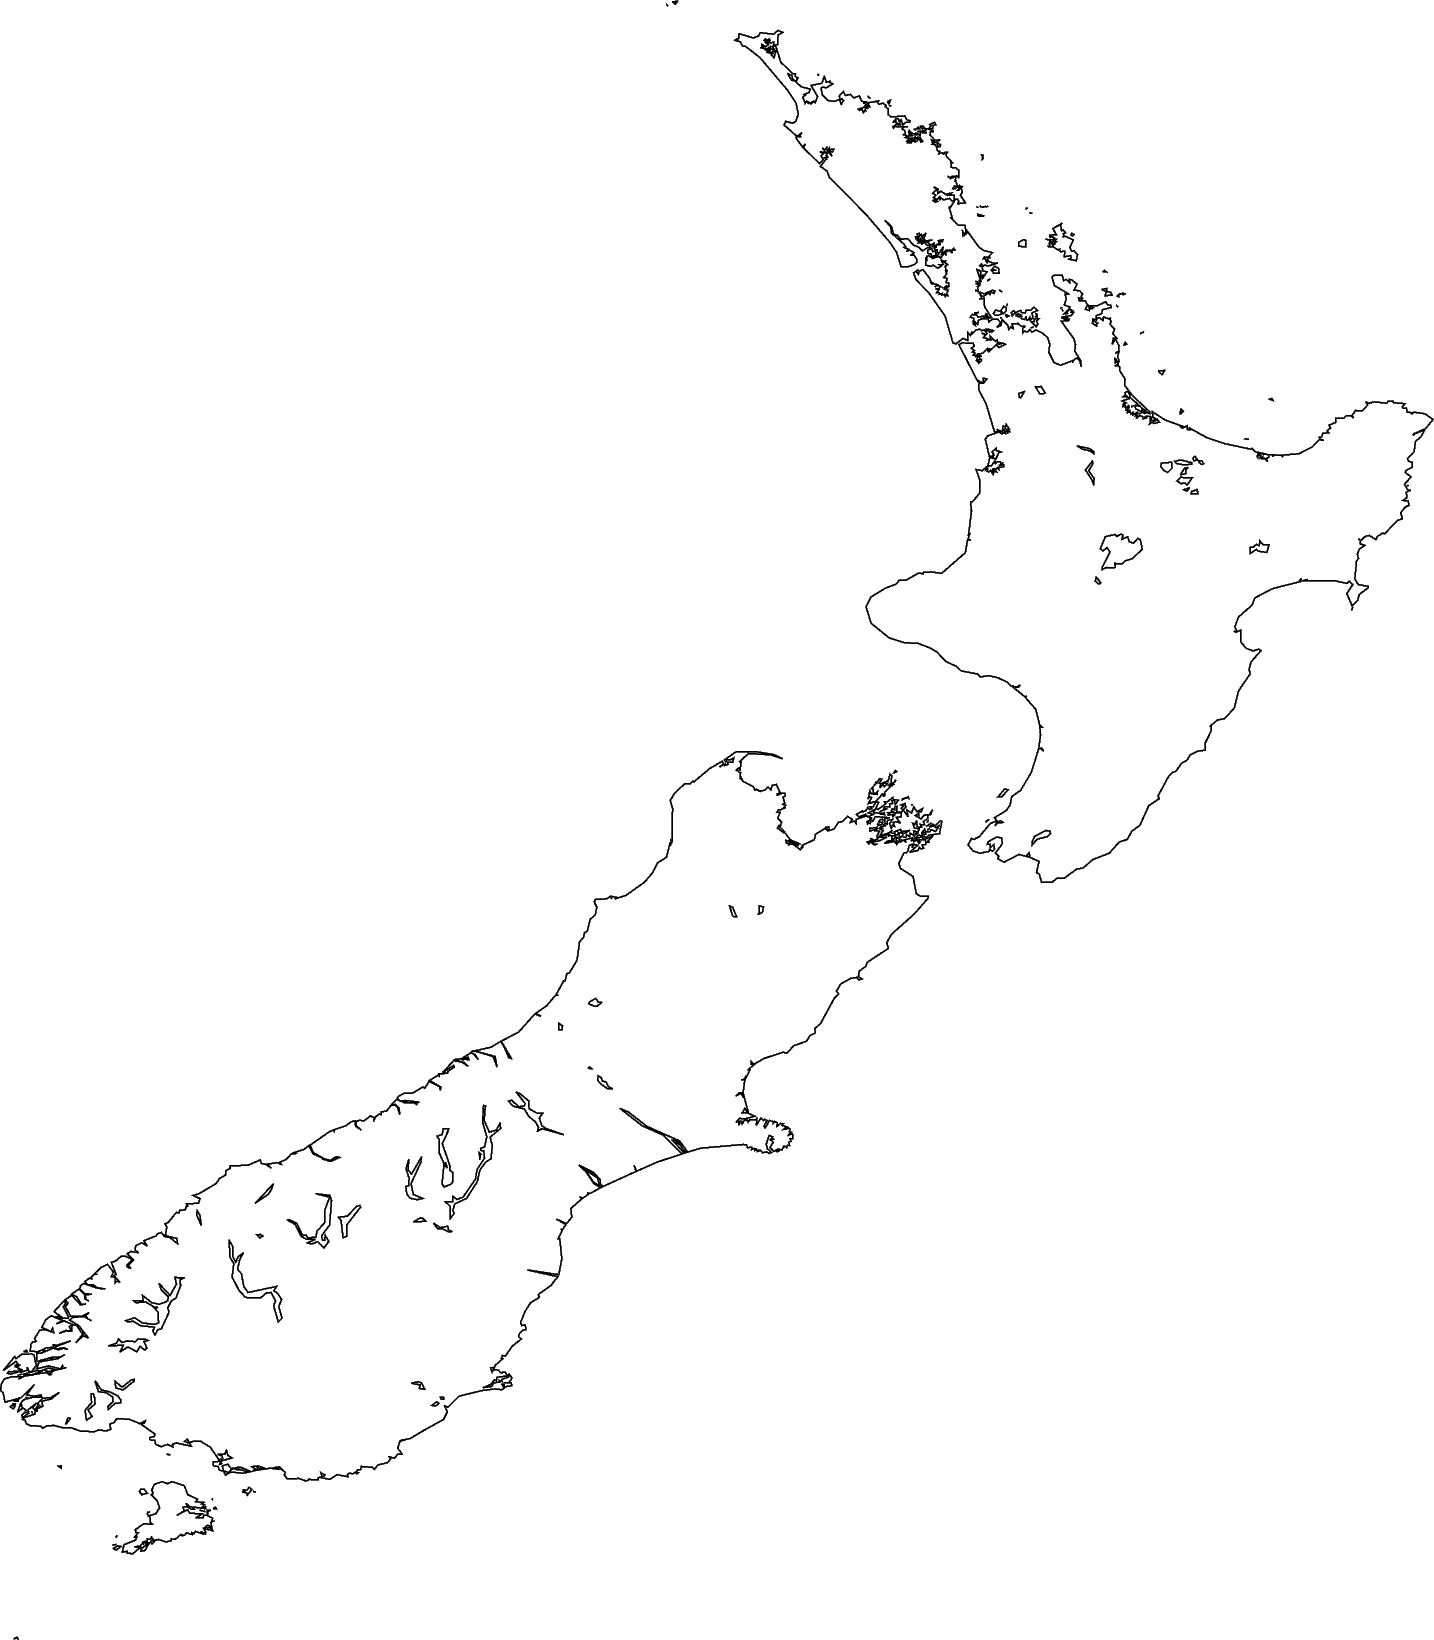

In [4]:
fig.show()

That's looking pretty good. Now let's try adding some colour:

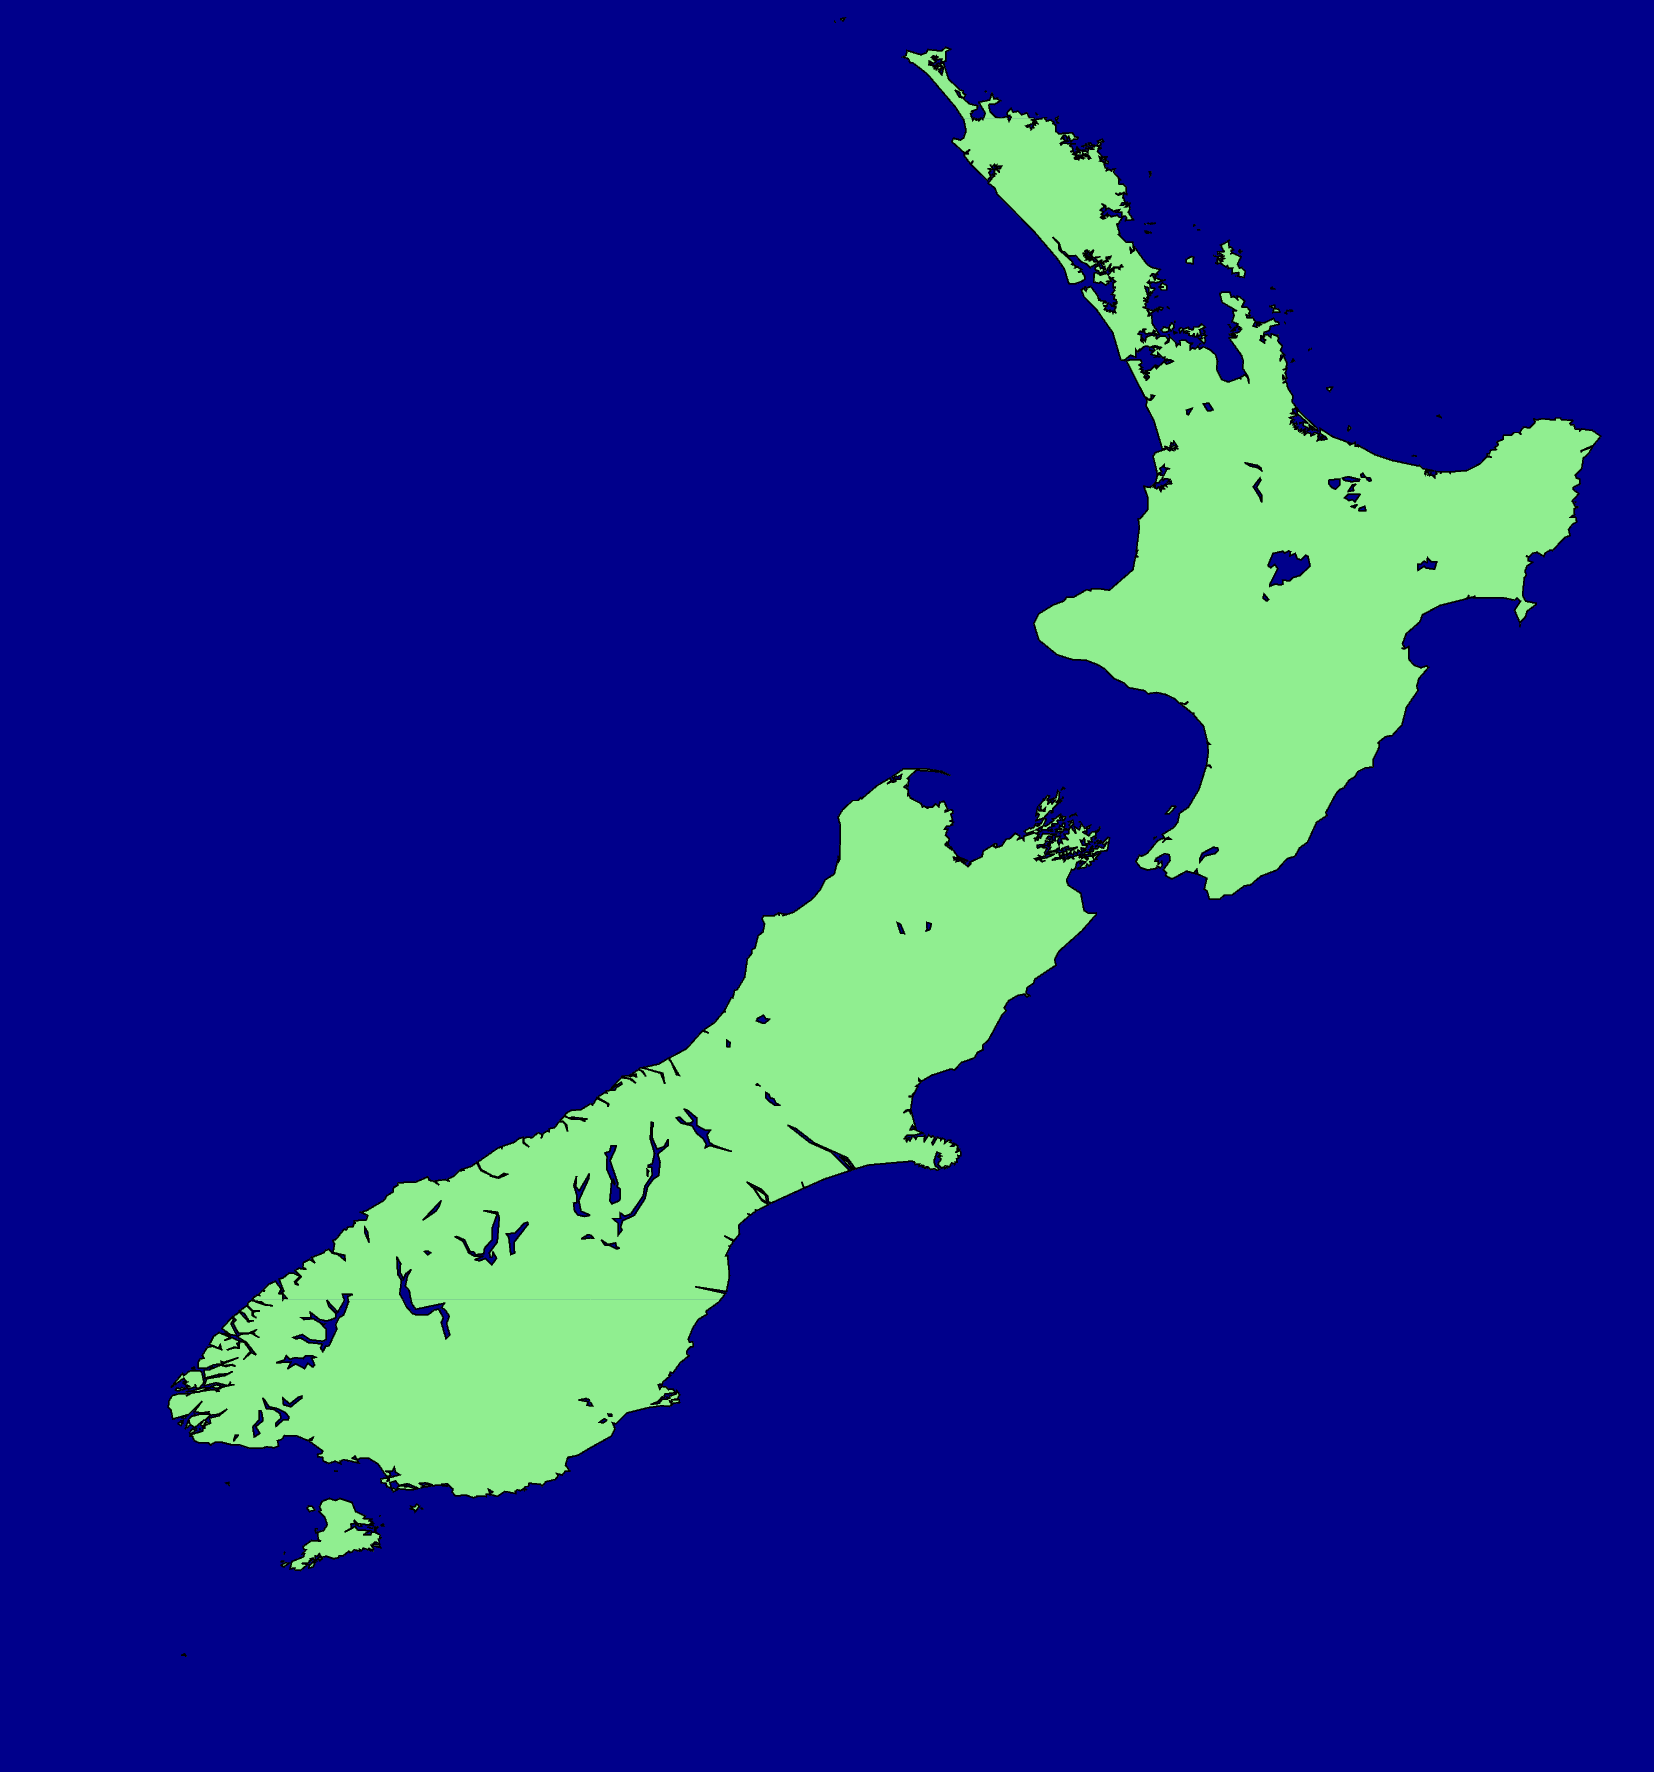

In [5]:
fig = pygmt.Figure()
fig.coast(region=[165, 179, -49, -34],
          shorelines=True,
          land='lightgreen',
          water='darkblue')
fig.show()

PyGMT can be given colour in multiple forms. There are preset [colour codes](https://docs.generic-mapping-tools.org/latest/gmtcolors.html) and you can also give it an RGB code (e.g. Red will be `255/0/0`). Try plotting some funky colours.

---
## Projections

As with any map, we also need to think about the map projection, particularly when plotting large areas. PyGMT supports multiple types of projection using the `projection` parameter. Have a look at the available types in the [projection gallery](https://www.pygmt.org/dev/projections/index.html).

We also use the `projection` parameter to set the width of our figure, for example `10c` means our figure will be 10cm wide. Let's try a few different projections out:

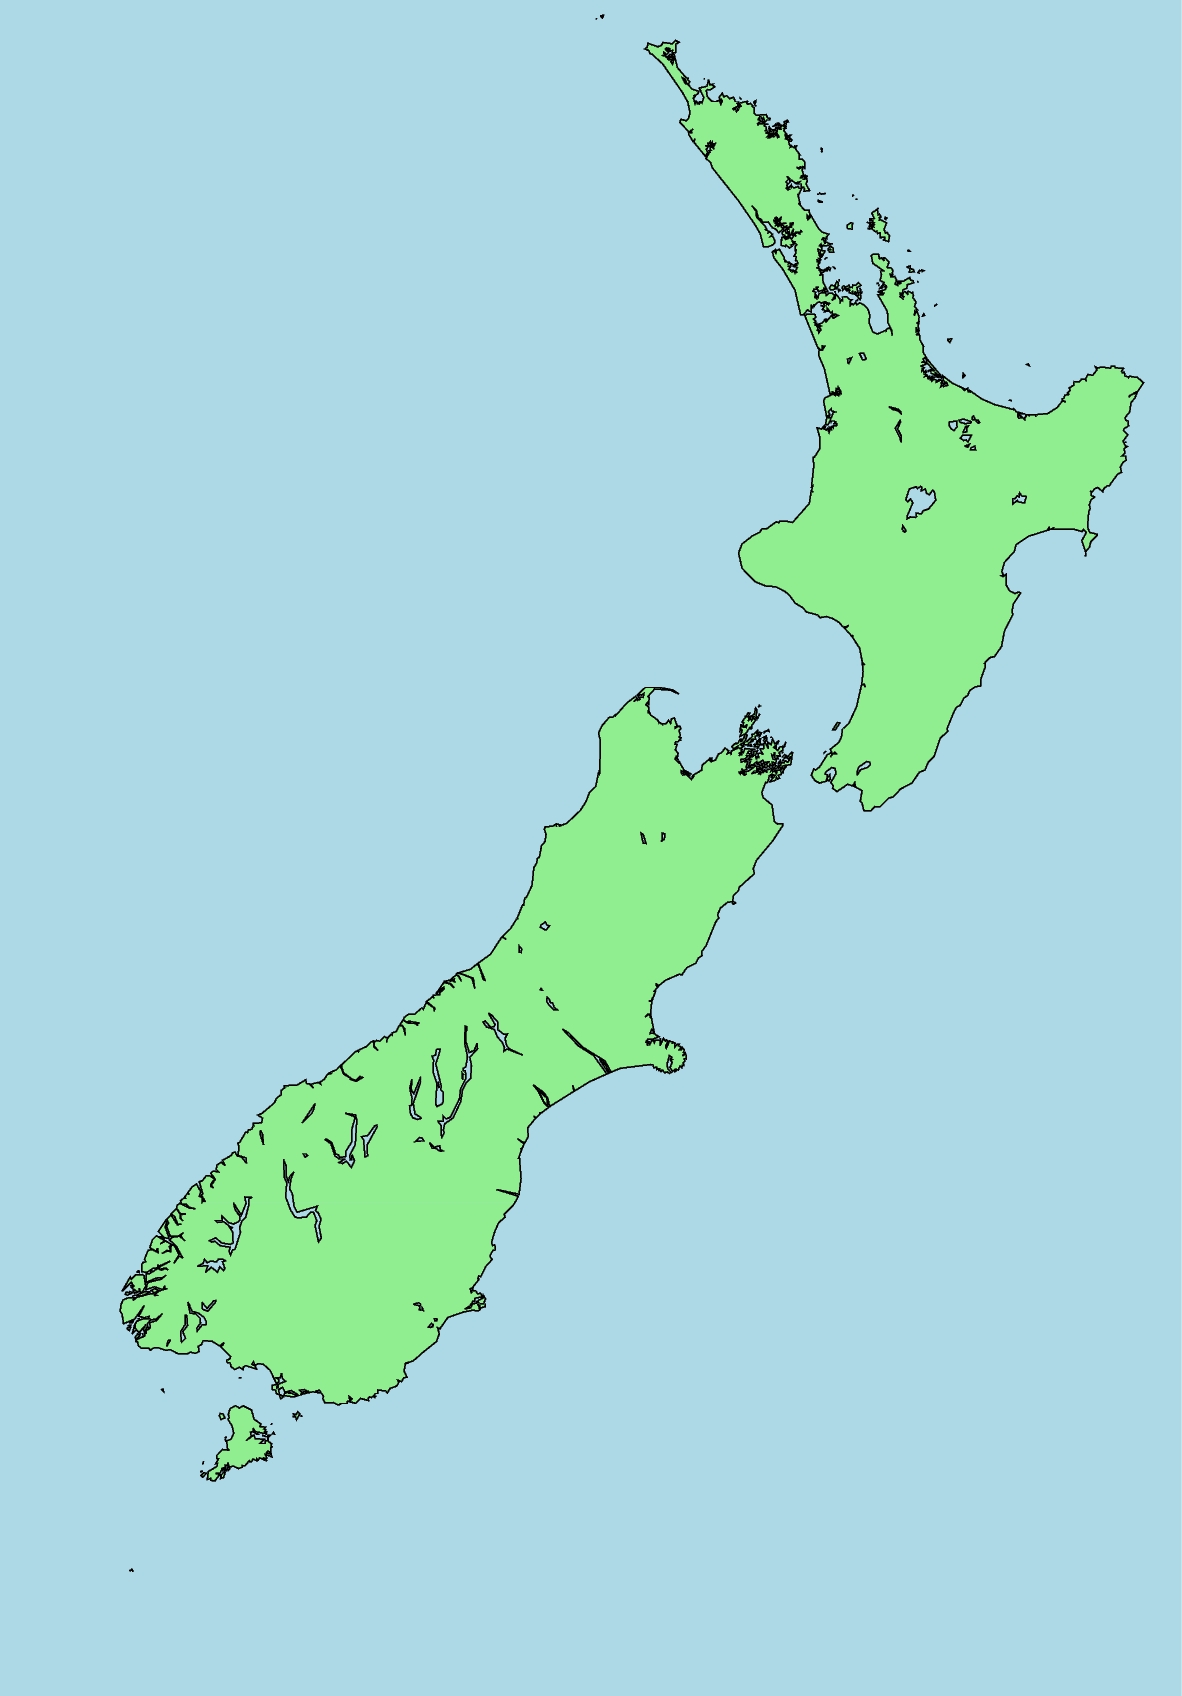

In [6]:
fig = pygmt.Figure()
fig.coast(region=[165, 179, -49, -34],
          shorelines=True,
          land='lightgreen',
          water='lightblue',
          projection='M10c')
fig.show()

This is a Mercator projection, which is pretty commonly used. Try changing it to a [Cassini Cylindrical](https://www.pygmt.org/dev/projections/cyl/cyl_cassini.html#sphx-glr-projections-cyl-cyl-cassini-py) projection:

In [8]:
# Your code here (hint, copy from above and edit the `projection` argument):

---

## Adding information

Now I'm sure you're thinking we need some axes labels on that plot! We can do this using the `frame` parameter, this has various options within it:

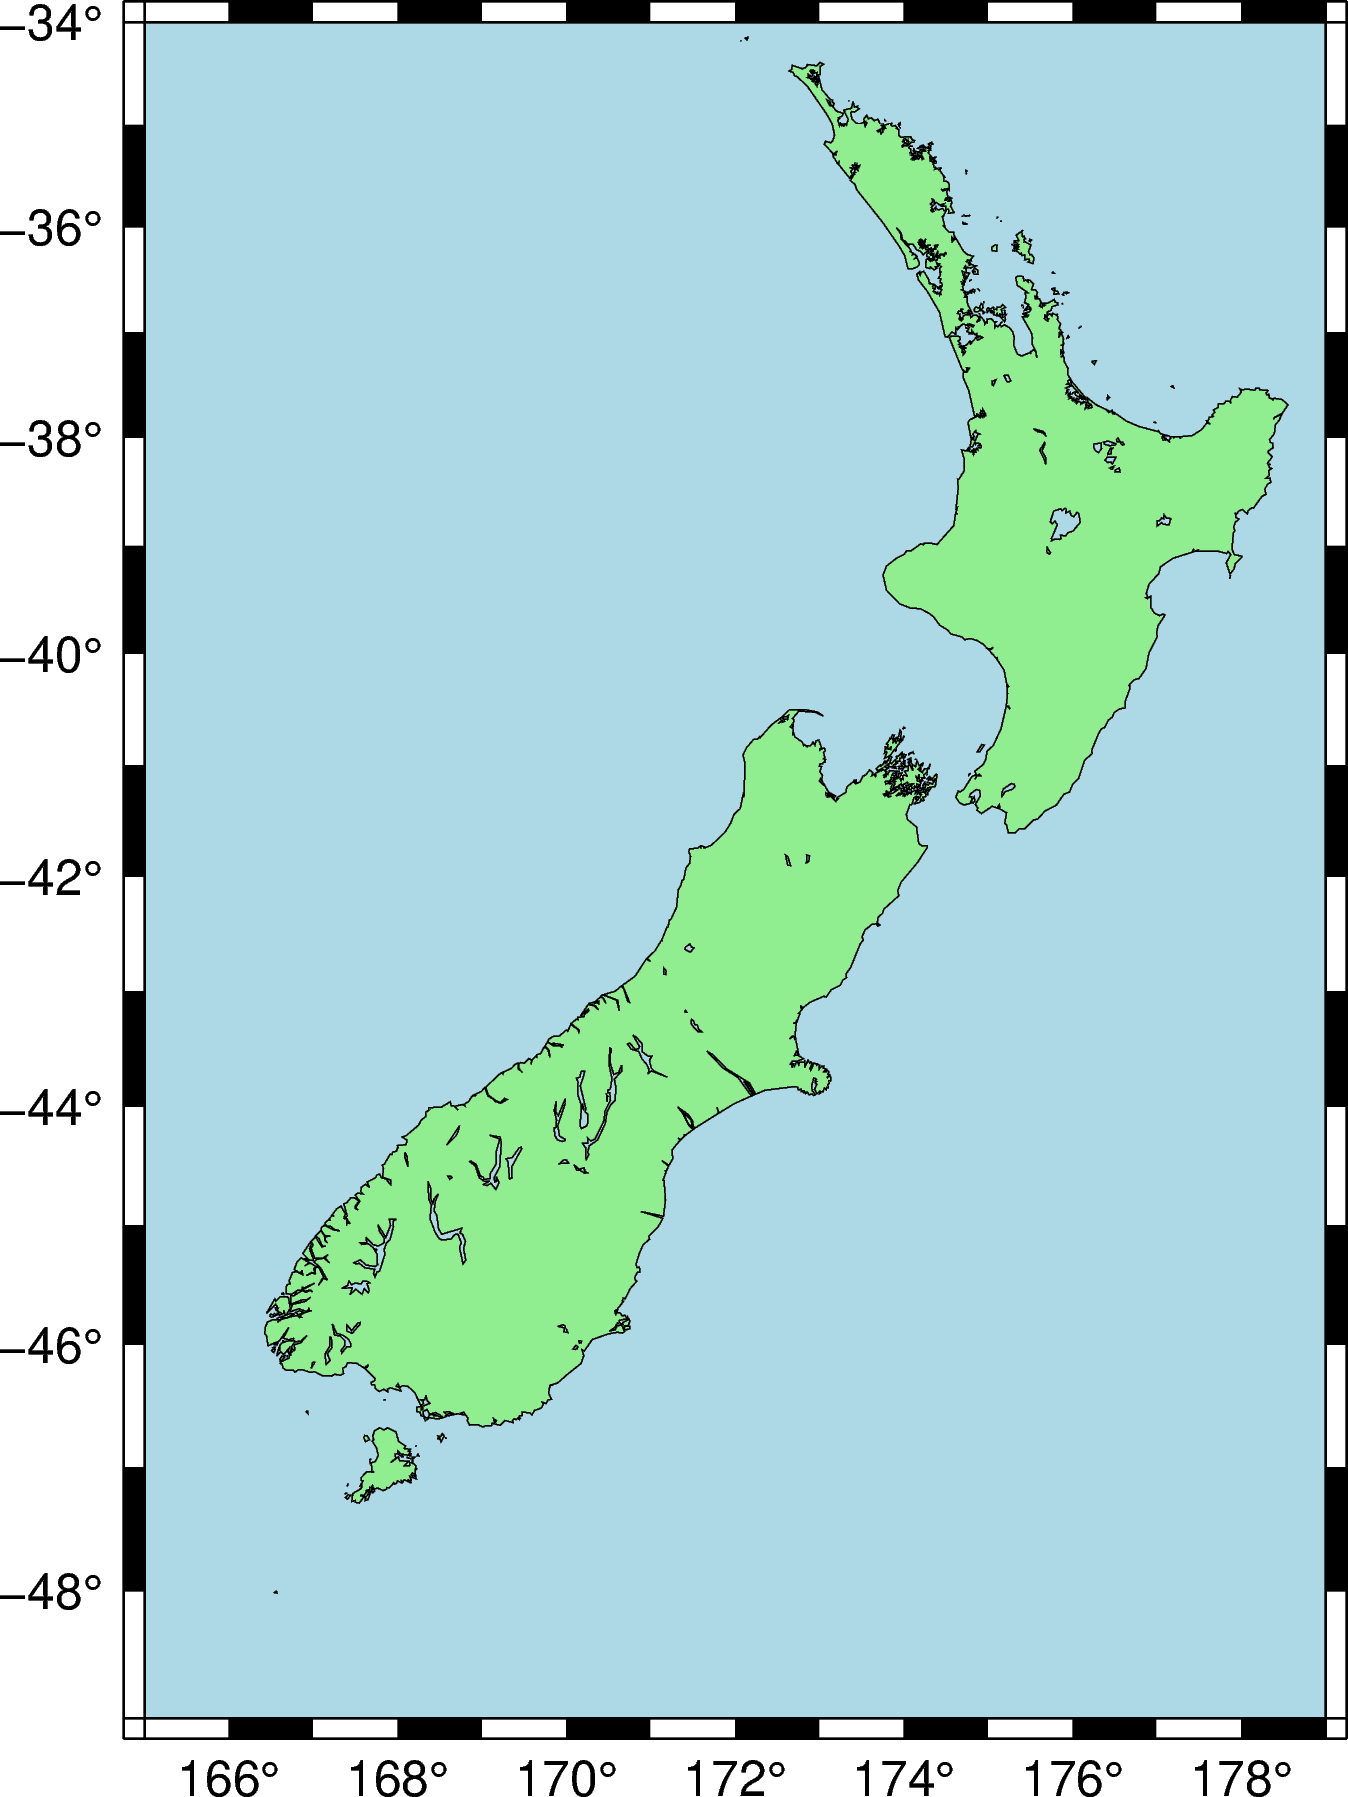

In [10]:
fig = pygmt.Figure()
fig.coast(region=[165, 179, -49, -34],
          shorelines=True,
          land='lightgreen',
          water='lightblue',
          projection='M10c',
          frame=['WSne', 'xa2f1', 'ya2f1'])
fig.show()

We gave the `frame` parameter three options. The first `'WSne'` selects which axes to plot and which to label. Uppercase letters are labelled, lowercase are not. The second and third option specify the tickmarks for each axis, `'xa2f1'` means we want a label every 2 units (in this case Longitude degrees), and a tick mark every 1 unit. Try changing these and see what happens.

We can also change various parameters about how our map looks using `pygmt.config`. Personally I like to use decimal degrees (`FORMAT_GEO_MAP='ddd.xx'` in the code below) and a more simple map design (`MAP_FRAME_TYPE='plain'` in the code below). A full list of configuration options can be found [here](https://docs.generic-mapping-tools.org/latest/gmt.conf.html), and includes things like what font to use and various default settings for drawing lines. 

Here we make these two simple changes:

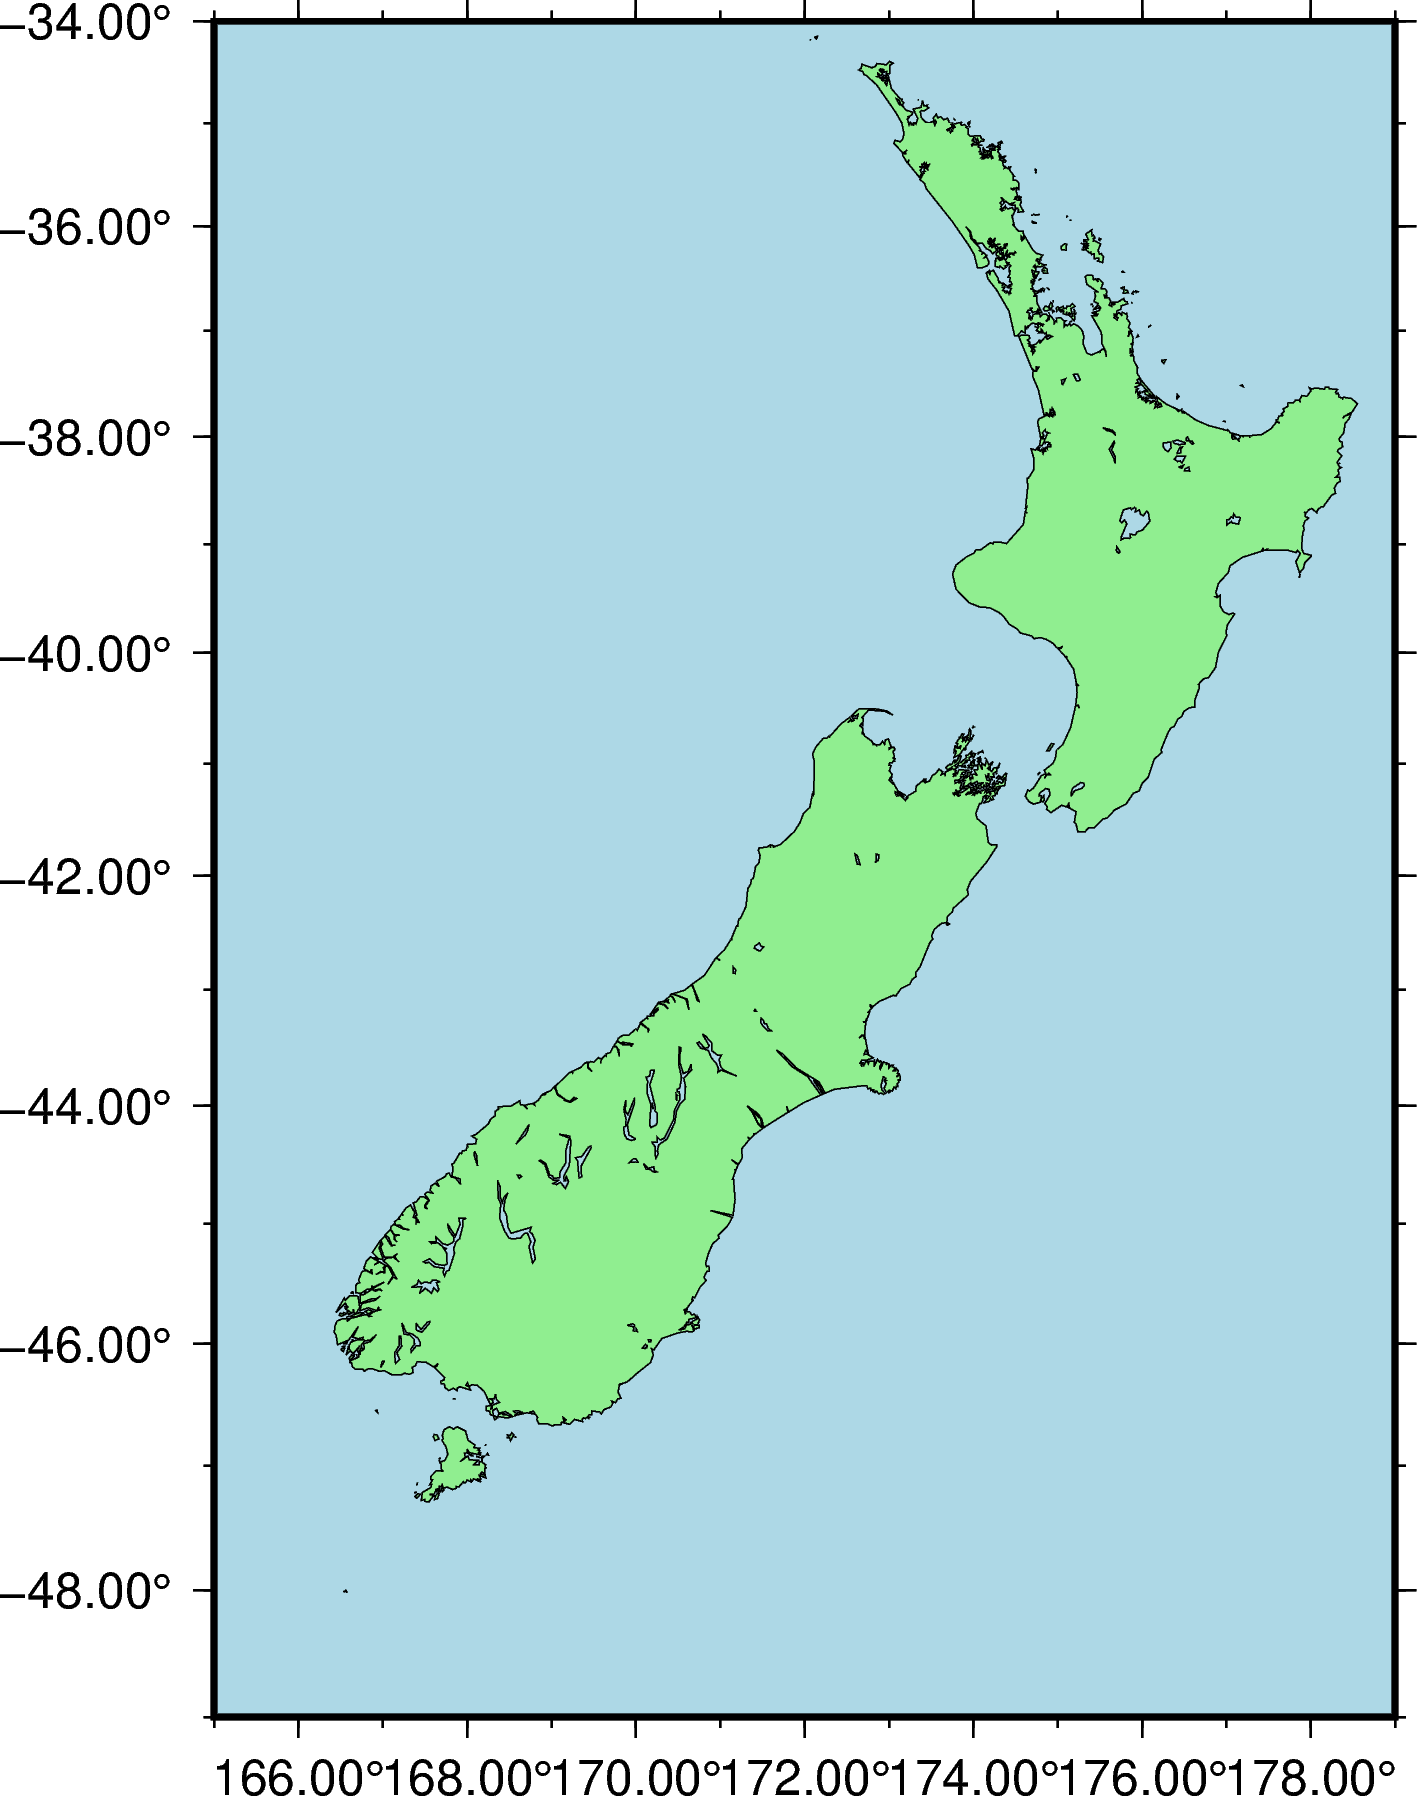

In [11]:
fig = pygmt.Figure()
pygmt.config(MAP_FRAME_TYPE='plain', FORMAT_GEO_MAP='ddd.xx')
fig.coast(region=[165, 179, -49, -34],
          shorelines=True,
          land='lightgreen',
          water='lightblue',
          projection='M10c',
          frame=['WSne', 'xa2f1', 'ya2f1'])
fig.show()

Lush! Now try and make a new map of somewhere in the world you find interesting...

In [ ]:
# Your answer here!

---

## Plotting Topography

Ok so now we've got the basics we can begin to dive into the real power of PyGMT.

First let's zoom into Wellington::

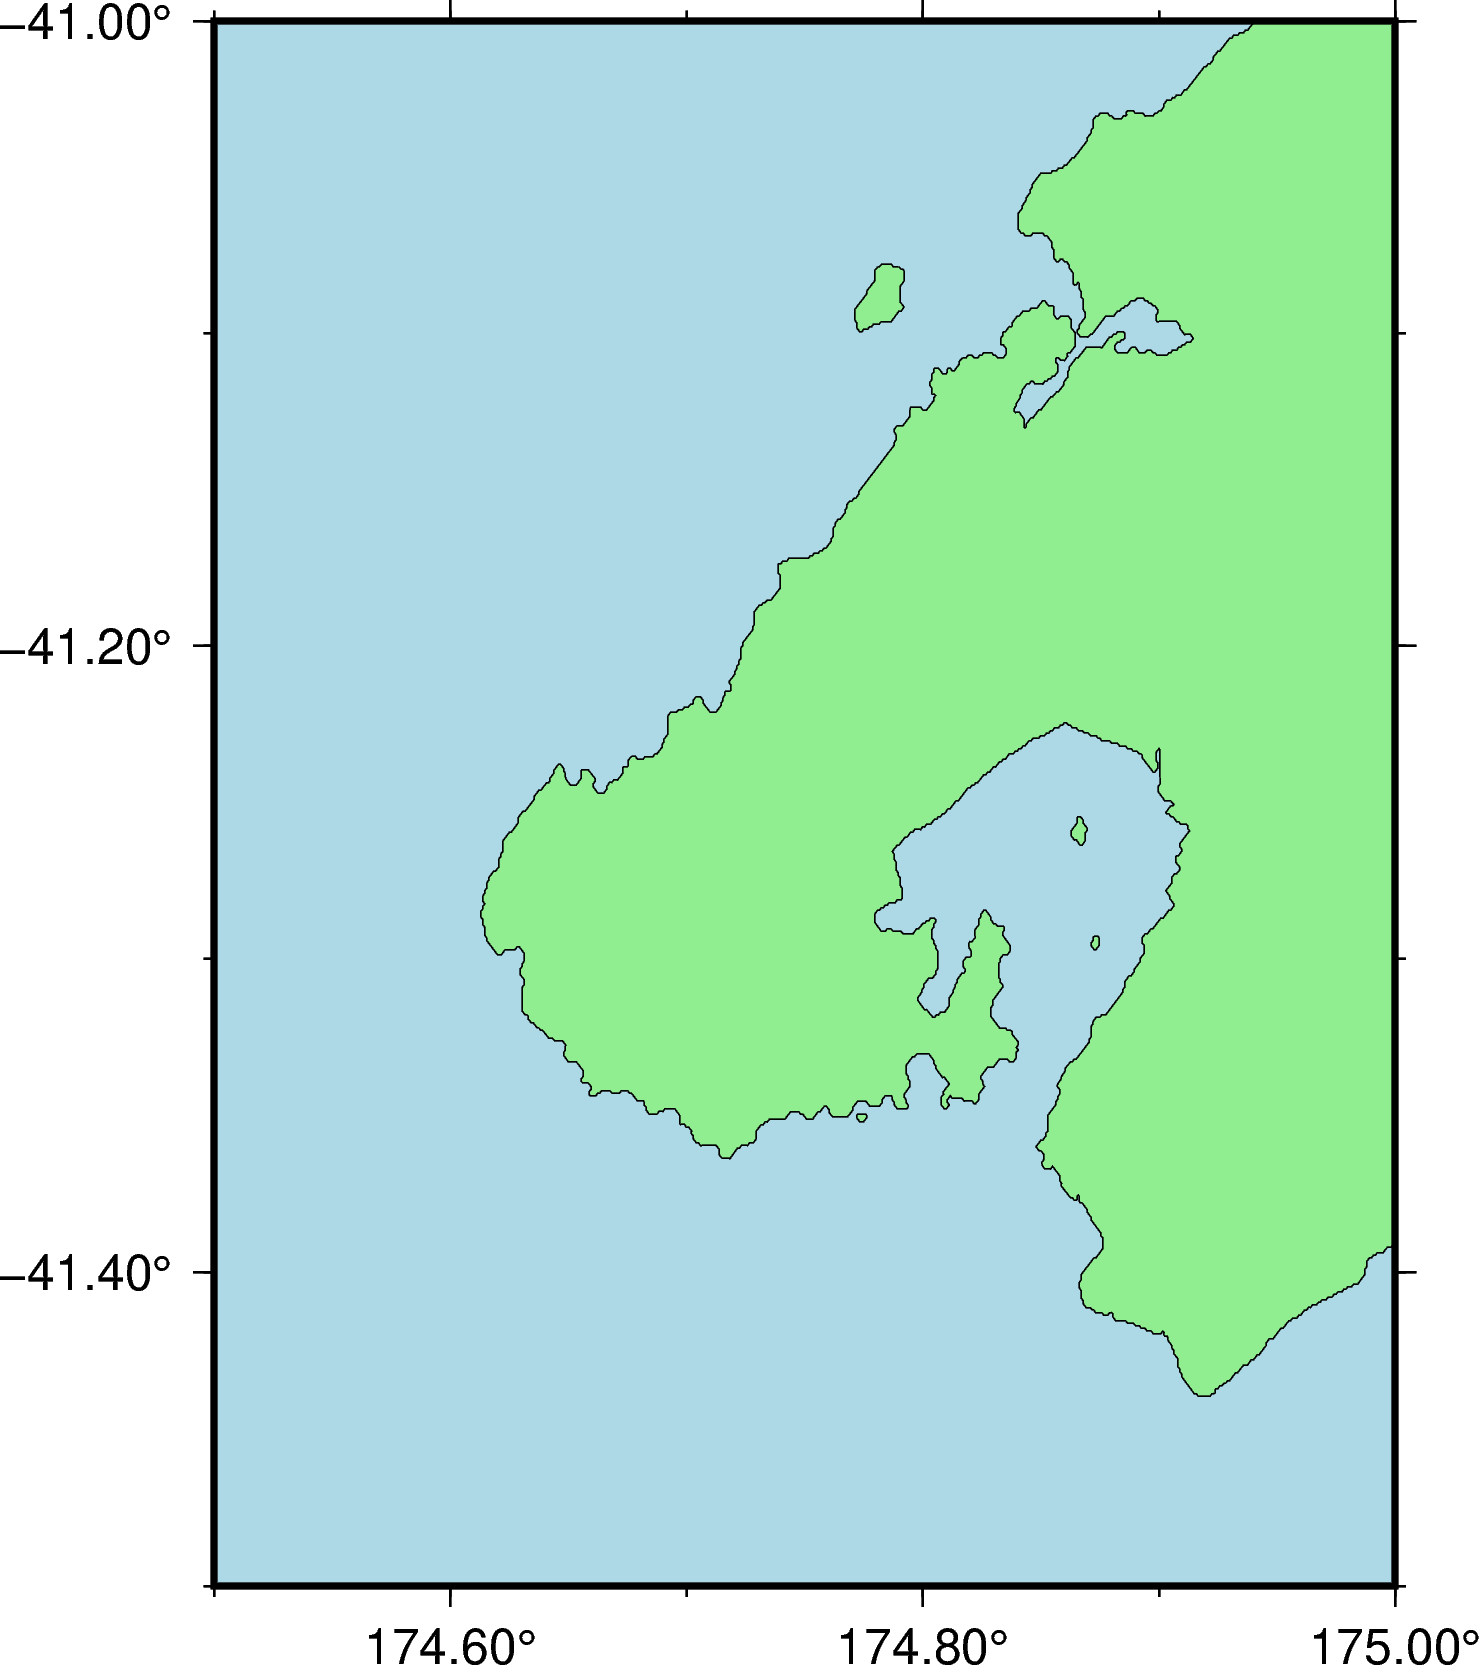

In [12]:
fig=pygmt.Figure()
pygmt.config(MAP_FRAME_TYPE='plain', FORMAT_GEO_MAP='ddd.xx')
fig.coast(region=[174.5, 175, -41.5, -41],
          shorelines=True,
          land='lightgreen',
          water='lightblue',
          projection='M10c',
          frame=['WSne', 'xa0.2f0.1', 'ya0.2f0.1'])
fig.show()

Notice how we changed the `region` and the `frame` parameters. Zoom in a little more if you want.

Now, everyone knows that Wellington is nothing without it's hills, so let's try plotting some topography using a Digital Elevation Model (DEM).

PyGMT has some preloaded DEMs which we can call very easily using `pygmt.datasets.load_earth_relief`, all we need to give it is the geographic region we're interested in and the resolution. You can see the full list of resolutions [here](https://www.generic-mapping-tools.org/remote-datasets/earth-relief.html), but for now we'll stay relatively coarse:

In [ ]:
DEM = pygmt.datasets.load_earth_relief(resolution='15s', region=[174.5,175,-41.5,-41])

fig=pygmt.Figure()
pygmt.config(MAP_FRAME_TYPE='plain', FORMAT_GEO_MAP='ddd.xx')
fig.grdimage(grid=DEM)
fig.show()

Here we've used `grdimage` to plot our DEM. It looks kinda weird and it's quite hard to tell that it's Wellington! Let's improve this by adding a frame and then plotting our coastline on top:

In [ ]:
DEM = pygmt.datasets.load_earth_relief(resolution='15s', region=[174.5,175,-41.5,-41])

fig=pygmt.Figure()
pygmt.config(MAP_FRAME_TYPE='plain', FORMAT_GEO_MAP='ddd.xx')
fig.grdimage(grid=DEM,
             projection='M10c', 
             frame=['WSne','xa0.2f0.1','ya0.2f0.1'])
fig.coast(shorelines=True)
fig.show()

There's a few things to take note of here. Firstly, see how we only need to define our region and projection once? Then also notice that we're not assigning a colour to `land` or `water` in the `coast` module. Try adding this in, you should see that it will cover up our DEM. This is because PyGMT builds up figures with layers, so the DEM is hidden underneath the coloured `land` or `water`

Do you think that's a sensible colour scale to be using for topography? PyGMT has a whole bunch of [preset colour scales](https://docs.generic-mapping-tools.org/latest/cookbook/cpts.html) we can use. Take a look and pick something better and pass it to the `cmap` parameter in `grdimage` like this:

In [ ]:
DEM = pygmt.datasets.load_earth_relief(resolution='15s', region=[174.5,175,-41.5,-41])

fig=pygmt.Figure()
pygmt.config(MAP_FRAME_TYPE='plain', FORMAT_GEO_MAP='ddd.xx')
fig.grdimage(grid=DEM,
             projection='M10c', 
             frame=['WSne','xa0.2f0.1','ya0.2f0.1'],
             cmap='geo')
fig.coast(shorelines=True)
fig.show()

And with any colour scale we need a colour bar. This is plotted using the `colorbar` module:

In [ ]:
DEM = pygmt.datasets.load_earth_relief(resolution='15s', region=[174.5,175,-41.5,-41])

fig=pygmt.Figure()
pygmt.config(MAP_FRAME_TYPE='plain', FORMAT_GEO_MAP='ddd.xx')
fig.grdimage(grid=DEM,
             projection='M10c', 
             frame=['WSne','xa0.2f0.1','ya0.2f0.1'],
             cmap='geo')
fig.coast(shorelines=True)
fig.colorbar(frame=["a200f100", "x+lElevation", "y+lm"],
             position='JRM')
fig.show()

This is starting to look good, but it's a little 8-bit. Let's up the resolution:

In [ ]:
DEM = pygmt.datasets.load_earth_relief(resolution='01s', region=[174.5,175,-41.5,-41])

fig=pygmt.Figure()
pygmt.config(MAP_FRAME_TYPE='plain', FORMAT_GEO_MAP='ddd.xx')
fig.grdimage(grid=DEM,
             projection='M10c', 
             frame=['WSne','xa0.2f0.1','ya0.2f0.1'],
             cmap='geo')
fig.coast(shorelines=True)
fig.colorbar(frame=["a200f100", "x+lElevation", "y+lm"],
             position='JRM')
fig.show()

Our topography looks fantastic, but do you notice how the bathymetry near the coastline looks a bit weird? This is because the bathymetry DEM is lower resolution than our topography DEM. So unless we can find some better bathymetry data, it's probably better if we just colour in the ocean with the `coast` module:

In [ ]:
DEM = pygmt.datasets.load_earth_relief(resolution='01s', region=[174.5,175,-41.5,-41])

fig=pygmt.Figure()
pygmt.config(MAP_FRAME_TYPE='plain', FORMAT_GEO_MAP='ddd.xx')
fig.grdimage(grid=DEM,
             projection='M10c', 
             frame=['WSne','xa0.2f0.1','ya0.2f0.1'],
             cmap='geo')
fig.coast(shorelines=True,
          water='lightblue')
fig.colorbar(frame=["a200f100", "x+lElevation", "y+lm"],
             position='JRM')
fig.show()

Now one more thing to add to our map, is some hillshade. This has the effect of highlighting topographic features. We can create this using the `grdgradient` module. This simulates a light source (e.g. the sun) and the shade that this would create. Let's try and recreate sunset with a light source due West at 50 degrees from the horizon and then plot it with the `shading` parameter in `grdimage`:

In [ ]:
DEM = pygmt.datasets.load_earth_relief(resolution='01s', region=[174.5,175,-41.5,-41])
hillshade = pygmt.grdgradient(grid=DEM, radiance=[270,50])

fig=pygmt.Figure()
pygmt.config(MAP_FRAME_TYPE='plain', FORMAT_GEO_MAP='ddd.xx')
fig.grdimage(grid=DEM,
             projection='M10c', 
             frame=['WSne','xa0.2f0.1','ya0.2f0.1'],
             cmap='geo',
             shading=hillshade)
fig.coast(shorelines=True,
          water='lightblue')
fig.colorbar(frame=["a200f100", "x+lElevation", "y+lm"],
             position='JRM')
fig.show()

Check out that fault!

# Plotting Data

Where PyGMT really come's into its own is plotting geographical data. Let's plot the North Island and a circle at our current location.

To do this we'll use the `plot` module, and the coordinates of the Cotton Building.

The `style` parameter controls the size and shape of the symbol. Here `c0.5c` plots a circle that is 0.5 cm wide, the 14 geometric symbols are listed [here](https://www.pygmt.org/dev/gallery/symbols/basic_symbols.html#sphx-glr-gallery-symbols-basic-symbols-py).

In [ ]:
fig=pygmt.Figure()
pygmt.config(MAP_FRAME_TYPE='plain', FORMAT_GEO_MAP='ddd.xx')
fig.coast(region=[173,179,-42,-36],
          shorelines=True,
          land='lightgreen',
          water='lightblue',
          projection='M10c',
          frame=['WSne','xa2f1','ya2f1'])
fig.plot(x=174.768, y=-41.29, style='c0.5c', color='red', pen='black')
fig.show()

Now we can take advantage of both python and PyGMT. Let's use a previous downloading tool to get earthquake location information from GeoNet:

In [ ]:
from helpers.get_data import get_geonet_quakes
# We also need to import datetime to specify start and end times for the download
import datetime

earthquakes = get_geonet_quakes(
    min_latitude=-42, max_latitude=-36, min_longitude=173, max_longitude=179,
    start_time=datetime.datetime(2020, 1, 1), end_time=datetime.datetime(2022, 1, 1))
print(f"You downloaded {len(earthquakes)} events")

Now let's plot those earthquakes...

In [ ]:
fig=pygmt.Figure()
pygmt.config(MAP_FRAME_TYPE='plain', FORMAT_GEO_MAP='ddd.xx')
fig.coast(region=[173,179,-42,-36],
          shorelines=True,
          land='lightgreen',
          water='lightblue',
          projection='M10c',
          frame=['WSne','xa2f1','ya2f1'])
fig.plot(x=earthquakes['longitude'],
         y=earthquakes['latitude'],
         style='c0.5c', color='red', pen='black')
fig.show()

Ok, now that looks a bit silly. We need to scale these earthquakes by their magnitude. Luckily this is very easy to do:

In [ ]:
fig=pygmt.Figure()
pygmt.config(MAP_FRAME_TYPE='plain', FORMAT_GEO_MAP='ddd.xx')
fig.coast(region=[173,179,-42,-36],
          shorelines=True,
          land='lightgreen',
          water='lightblue',
          projection='M10c',
          frame=['WSne','xa2f1','ya2f1'])
fig.plot(x=earthquakes['longitude'],
         y=earthquakes['latitude'],
         size=0.02 * (2**earthquakes['magnitude']),
         style='cc', color='red', pen='black')
fig.show()

That's looking much better. See how we now use the `size` parameter in `plot` and pass it the magnitude values. Because magnitudes are a logratihmic scale we then scaled these values with a power law.

The seismicity under the North Island has a large three-dimensional distribution. Have a look at minimum and maximum earthquake depths in our catalogue using `min` and `max`...

Why don't we try displaying this depth information in our map? Rather than colouring all of these earthquakes red, we can colour them depending on their depth. To do this we're going to make a new colour scale using the `makecpt` module:

In [ ]:
fig=pygmt.Figure()
pygmt.config(MAP_FRAME_TYPE='plain', FORMAT_GEO_MAP='ddd.xx')
pygmt.makecpt(cmap='lajolla', series=[earthquakes['depth'].min(), earthquakes['depth'].max()])

fig.coast(region=[173,179,-42,-36],
          shorelines=True,
          land='lightgreen',
          water='lightblue',
          projection='M10c',
          frame=['WSne','xa2f1','ya2f1'])
fig.plot(x=earthquakes['longitude'],
         y=earthquakes['latitude'],
         size=0.02 * (2**earthquakes['magnitude']),
         color=earthquakes['depth'],
         cmap=True,
         style='cc', pen='black')
fig.colorbar(frame='af+l"Depth (km)"') # We add a label to our colour scale with +l
fig.show()

That's looking pretty good, and we can see that the earthquakes tend to be getting deeper towards the northwest, this is because of the subduction zone. If we really want to look at this we should make a cross section. This is the final thing we're going to learn to do in this session.

To make a cross section we take advantage of the `project` module. For this we need to define the line of projection with a `center`, `azimuth`, `length` and `width`

We will first want to select a cross section that is roughly perpendicular to the subduction zone. We can use `project` in `generate` mode to plot the line of cross section.

Here we define the `center` as roughly the middle of the North Island, `[176,-39]`, an `azimuth` that is perpendicular to the subduction zone, `135`, and a `length` that goes 100 km to the northwest, and 200 km to the southeast. We then use the `generate` parameter to calculate a point every 10 km along that line:

In [ ]:
fig=pygmt.Figure()
pygmt.config(MAP_FRAME_TYPE='plain', FORMAT_GEO_MAP='ddd.xx')
pygmt.makecpt(cmap='lajolla', series=[earthquakes['depth'].min(), earthquakes['depth'].max()])

fig.coast(region=[173,179,-42,-36],
          shorelines=True,
          land='lightgreen',
          water='lightblue',
          projection='M10c',
          frame=['WSne','xa2f1','ya2f1'])
fig.plot(x=earthquakes['longitude'],
         y=earthquakes['latitude'],
         size=0.02 * (2**earthquakes['magnitude']),
         color=earthquakes['depth'],
         cmap=True,
         style='cc', pen='black')
fig.colorbar(frame='af+l"Depth (km)"') # We add a label to our colour scale with +l

section_line = pygmt.project(center=[176,-39], azimuth=135, length=[-100, 200], unit=True, generate=10)
fig.plot(x=section_line['r'],
         y=section_line['s'],
         pen="3p,-")

fig.show()

In [ ]:
projected_earthquakes = pygmt.project(data=earthquakes[['longitude','latitude','depth','magnitude']],
                             azimuth=135,
                             center=[176,-39],
                             length=[-100,200],
                             width='-100/100',
                             convention='pz',
                             unit=True)
projected_earthquakes.columns = ['distance','depth','magnitude']

Now if you have a look at this new datafame `projected_earthquakes` you will see that it has three columns. This is all we need for plotting our cross section

In [ ]:
### Look at the new dataframe here

Now let's plot that cross section next to our map...

In [ ]:
fig=pygmt.Figure()
pygmt.config(MAP_FRAME_TYPE='plain', FORMAT_GEO_MAP='ddd.xx')
pygmt.makecpt(cmap='lajolla', series=[earthquakes['depth'].min(), earthquakes['depth'].max()])

# Plotting the map
fig.coast(region=[173,179,-42,-36],
          shorelines=True,
          land='lightgreen',
          water='lightblue',
          projection='M10c',
          frame=['WSne','xa2f1','ya2f1'])
fig.plot(x=earthquakes['longitude'],
         y=earthquakes['latitude'],
         size=0.02 * (2**earthquakes['magnitude']),
         color=earthquakes['depth'],
         cmap=True,
         style='cc', pen='black')
fig.colorbar(frame='af+l"Depth (km)"')
section_line = pygmt.project(center=[176,-39], azimuth=135, length=[-100, 200], unit=True, generate=10)
fig.plot(x=section_line['r'],
         y=section_line['s'],
         pen="3p,-")

# Plotting the cross section
fig.shift_origin(xshift="12c") # Shift the plot to the right hand side by 12 cm
fig.basemap(region=[-100,200,0,300],
            projection='X12c/-12c', # because both our axes are 300 km let's keep it to scale
            frame=['nESw','xa50f10+l"Distance (km)"','ya50f10+l"Depth (km)"'])
fig.plot(x=projected_earthquakes['distance'],
         y=projected_earthquakes['depth'],
         size=0.02 * (2**projected_earthquakes['magnitude']),
         color=projected_earthquakes['depth'],
         cmap=True,
         style='cc', pen='black')

fig.show()

Now, pick an interesting earthquake sequence and make a similar plot with a cross section. You'll need to edit your earthquake catalogue parameters:

In [ ]:
### Your answer here

In the next notebook we'll plot some different types of data and continue to explore PyGMT

# TODO:

- [ ] Scale bars and N arrow in "Adding info"
- [ ] Colorbars
- [ ] Legends
- [ ] Saving figures